# trees

In [1]:
(ns opencv4.trees
(:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

; https://stackoverflow.com/questions/31310307/best-way-to-segment-a-tree-in-plantation-aerial-image-using-opencv?rq=1

nil

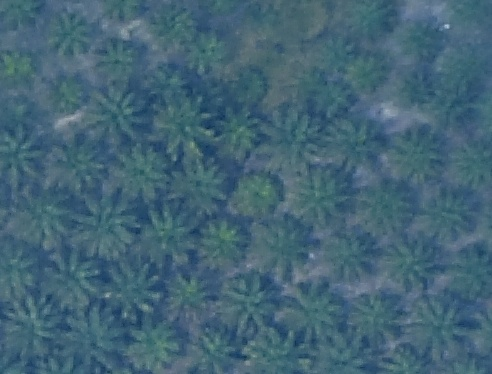

In [2]:
(def original (-> "resources/images/trees.png" imread))
(def trees
  (-> original clone (cvt-color! COLOR_BGR2HSV)))

(u/>>> original)

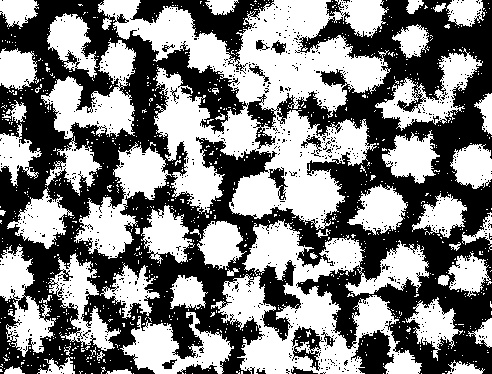

In [3]:
(def in-range-pict
  (new-mat))

(in-range trees (new-scalar 100 80 100) (new-scalar 120 255 255) in-range-pict)
(bitwise-not! in-range-pict)

(u/>>> in-range-pict)

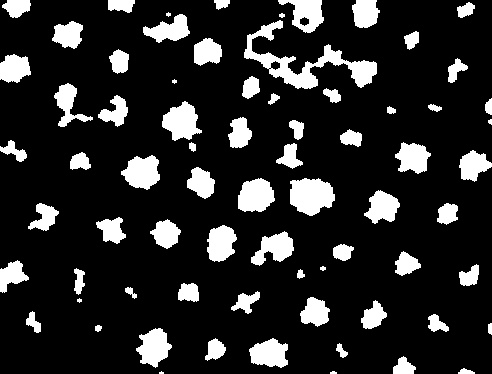

In [4]:
(def elem
  (get-structuring-element MORPH_ELLIPSE (new-size 5 5)))
(morphology-ex! in-range-pict MORPH_ERODE elem (new-point -1 -1) 2)
(morphology-ex! in-range-pict MORPH_OPEN elem)

(u/>>> in-range-pict)

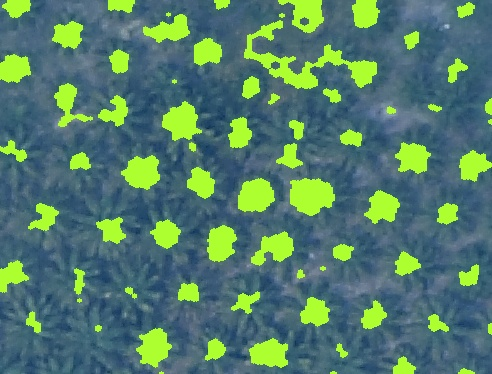

In [9]:
; https://stackoverflow.com/questions/18211827/opencv-converting-one-color-to-another

(def mask (new-mat))
(in-range in-range-pict (new-scalar 0 255 255) (new-scalar 0 0 0) mask)
; (bitwise-not! mask)
(def mat2
  (new-mat (.size trees) CV_8UC3))

(set-to mat2 rgb/greenyellow)
(copy-to original mat2 mask)

(u/>>> mat2)